### Task 1:

##### Green Screen Effect
- Merge two images to create a composite image
- Green pixels are substituted by background pixels

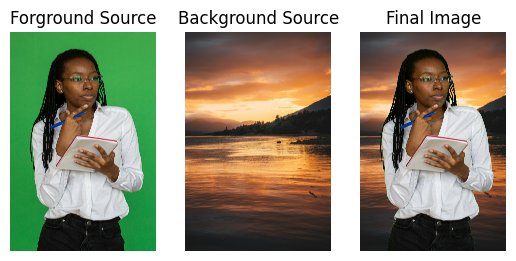

<Figure size 640x480 with 0 Axes>

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plotter(details, row, columns):
    for i in range(len(details)):
        plt.subplot(row, columns, i + 1)
        plt.imshow(details[i][0], cmap = details[i][2] if len(details[i]) >= 3 else None)
        plt.title(details[i][1] if len(details[i]) >= 2 else "")
        plt.axis("off")

    plt.show()

imgT1Foreground = cv2.imread("Pexels_Edited_Greenscreen_Foreground.jpg")
imgT1ForegroundHSV = cv2.cvtColor(imgT1Foreground, cv2.COLOR_BGR2HSV)

imgT1Background = cv2.imread("Pexels_Background.jpg")
imgT1BackgroundRGB = cv2.cvtColor(imgT1Background, cv2.COLOR_BGR2RGB)

lowerGreen = np.array([35, 100, 100])
upperGreen = np.array([85, 255, 255])

mask = cv2.inRange(imgT1ForegroundHSV, lowerGreen, upperGreen)
maskInverted = cv2.bitwise_not(mask)

forgroundIsolated = cv2.bitwise_and(imgT1ForegroundHSV, imgT1ForegroundHSV, mask=maskInverted)
forgroundIsolatedRGB = cv2.cvtColor(forgroundIsolated, cv2.COLOR_HSV2RGB)

backgroundInvertedMaskRGB = cv2.bitwise_and(imgT1BackgroundRGB, imgT1BackgroundRGB, mask=mask)

finalImage = cv2.add(forgroundIsolatedRGB, backgroundInvertedMaskRGB)

imgT1ForegroundRGB = cv2.cvtColor(imgT1Foreground, cv2.COLOR_BGR2RGB)

plotter([[imgT1ForegroundRGB, "Forground Source"],
         [imgT1BackgroundRGB, "Background Source"],
         [finalImage, "Final Image"]],
         1, 3)

plt.subplots_adjust(left=0.05, right=0.95)

### Task 2: Monadic Image Processing

i) Changing Data Type<br>
ii) Brightness<br>
iii) Contrast<br>
iv) Negative/Inverse Transformation<br>
v) Gamma Correction / Power Law Transformation<br>
vi) Logarithmic Transformation

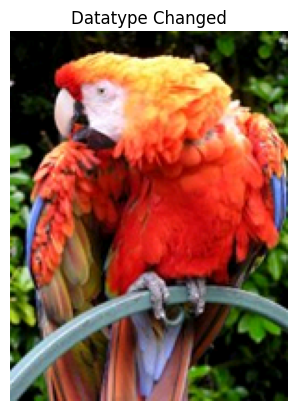

In [86]:
imgT2 = cv2.imread("RGB_Bit_Depth_24.png")

imgT2.astype(np.float32)

imgT2RGB = cv2.cvtColor(imgT2, cv2.COLOR_BGR2RGB)

plotter([[imgT2RGB, "Datatype Changed"]], 1, 1)


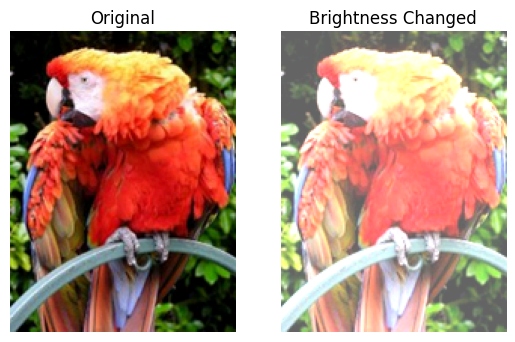

In [87]:
brightness_val = 100

imgT2BrightnessChanged = cv2.add(imgT2RGB, np.full(imgT2RGB.shape, brightness_val, dtype=np.uint8))

plotter([[imgT2RGB, "Original"], 
         [imgT2BrightnessChanged, "Brightness Changed"]],
         1, 2)

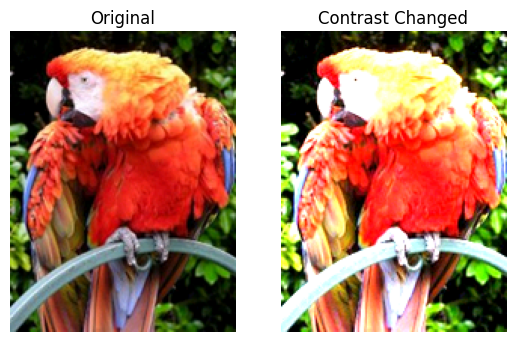

In [88]:
contrast_scale = 1.99

imgT2ContrastChanged = np.clip(contrast_scale * imgT2RGB, 0, 255).astype(np.uint8)

plotter([[imgT2RGB, "Original"], 
         [imgT2ContrastChanged, "Contrast Changed"]],
         1, 2)

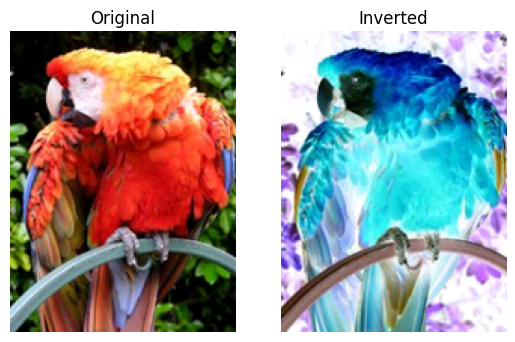

In [89]:
imgT2Inverted = 255 - imgT2RGB

plotter([[imgT2RGB, "Original"], 
         [imgT2Inverted, "Inverted"]],
         1, 2)

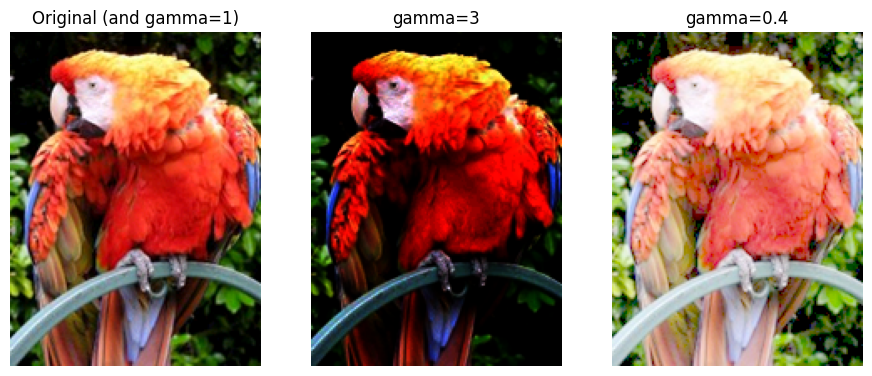

In [90]:
imgT2G1 = np.array(255 * (imgT2RGB / 255) ** 1, dtype='uint8')

imgT2G3 = np.array(255 * (imgT2RGB / 255) ** 3, dtype='uint8')

imgT3G0_4 = np.array(255 * (imgT2RGB / 255) ** 0.4, dtype='uint8')

plt.figure(figsize=(11, 6))
plotter([[imgT2G1, "Original (and gamma=1)"], 
         [imgT2G3, "gamma=3"], 
         [imgT3G0_4, "gamma=0.4"]],
         1, 3)

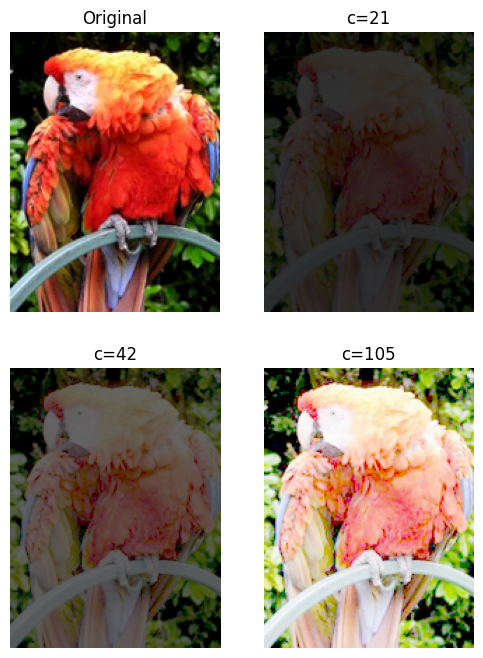

In [91]:
imgT2Log = np.log10(imgT2RGB.astype(np.float32) + 1)

imgT2C21 = (21 * imgT2Log).astype(np.uint8)
imgT2C42 = (42 * imgT2Log).astype(np.uint8)
imgT2C105 = (105 * imgT2Log).astype(np.uint8)

plt.figure(figsize=(6, 8))
plotter([[imgT2RGB, "Original"], 
         [imgT2C21, "c=21"], 
         [imgT2C42, "c=42"], 
         [imgT2C105, "c=105"]],
         2, 2)

### Task 3: Monadic Image Processing

i) Detection of movement in a scene through subsequent frames subtraction<br>
ii) Detection of object in video frames through frame differencing & thresholding<br>
iii) Addition<br>
iv) Subtraction<br>
v) Multiplication<br>
vi) Division

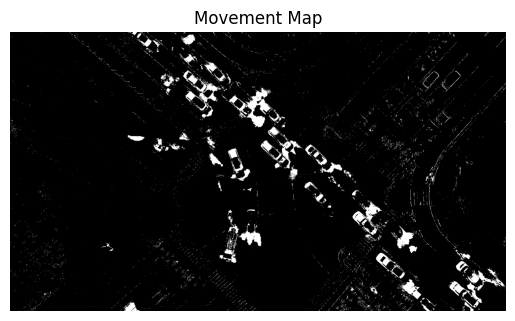

In [92]:
imgT3A1 = cv2.imread("Pexels_Task3_A1.jpg")
imgT3A2 = cv2.imread("Pexels_Task3_A2.jpg")

imgT3A1Gray = cv2.cvtColor(imgT3A1, cv2.COLOR_BGR2GRAY)
imgT3A2Gray = cv2.cvtColor(imgT3A2, cv2.COLOR_BGR2GRAY)

absSubtracted = np.abs(cv2.subtract(imgT3A1Gray, imgT3A2Gray))

threshold = 20
_, imgT3AMovementMap = cv2.threshold(absSubtracted, threshold, 255, cv2.THRESH_BINARY)

plotter([[imgT3AMovementMap, "Movement Map", "gray"]], 1, 1)

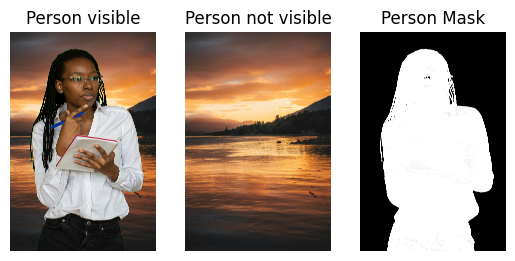

In [93]:
imgT3B1RGB = finalImage
imgT3B2RGB = imgT1BackgroundRGB

imgT3B1Gray = cv2.cvtColor(imgT3B1RGB, cv2.COLOR_RGB2GRAY)
imgT3B2Gray = cv2.cvtColor(imgT3B2RGB, cv2.COLOR_RGB2GRAY)

diff = cv2.absdiff(imgT3B1Gray, imgT3B2Gray)

threshold = 0
_, imgT3BMask = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

plotter([[imgT3B1RGB, "Person visible"], 
         [imgT3B2RGB, "Person not visible"], 
         [imgT3BMask, "Person Mask", "gray"]],
         1, 3)

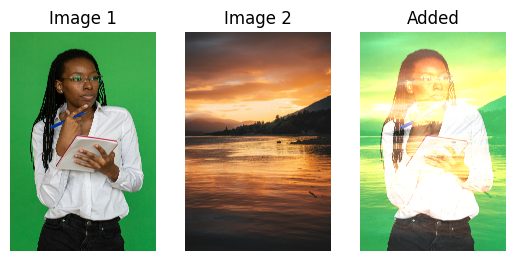

In [94]:
imgT4Add = cv2.add(imgT1ForegroundRGB, imgT1BackgroundRGB)

plotter([[imgT1ForegroundRGB, "Image 1"], 
         [imgT1BackgroundRGB, "Image 2"], 
         [imgT4Add, "Added"]],
         1, 3)

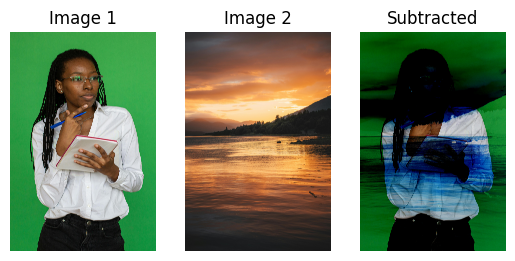

In [95]:
imgT4Subtract = cv2.subtract(imgT1ForegroundRGB, imgT1BackgroundRGB)

plotter([[imgT1ForegroundRGB, "Image 1"], 
         [imgT1BackgroundRGB, "Image 2"], 
         [imgT4Subtract, "Subtracted"]],
         1, 3)

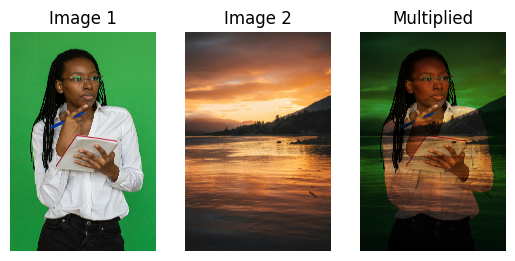

In [96]:
imgT4Multiply = cv2.multiply(imgT1ForegroundRGB.astype(np.float32) / 255, imgT1BackgroundRGB.astype(np.float32) / 255)

plotter([[imgT1ForegroundRGB, "Image 1"], 
         [imgT1BackgroundRGB, "Image 2"], 
         [imgT4Multiply, "Multiplied"]],
         1, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.99998].


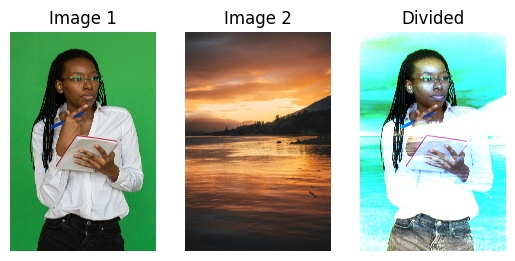

In [97]:
imgT4Divide = cv2.divide(imgT1ForegroundRGB.astype(np.float32) / 255, imgT1BackgroundRGB.astype(np.float32) / 255)

plotter([[imgT1ForegroundRGB, "Image 1"], 
         [imgT1BackgroundRGB, "Image 2"], 
         [imgT4Divide, "Divided"]],
         1, 3)